In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('One_Pillar_Pagoda_Hanoi.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
def haar_1d_forward(signal):
    n = len(signal)
    if n == 1:
        return signal.copy()
    
    # Kiểm tra chiều dài tín hiệu là chẵn
    if n % 2 != 0:
        raise ValueError("Chiều dài tín hiệu phải là lũy thừa của 2.")
    
    avg = (signal[::2] + signal[1::2]) / np.sqrt(2)  # Hệ số tổng (approximation)
    diff = (signal[::2] - signal[1::2]) / np.sqrt(2)  # Hệ số hiệu (detail)
    
    # Ghép approximation và detail
    transformed = np.concatenate([avg, diff])
    return transformed

def haar_1d_inverse(transformed):
    n = len(transformed)
    if n == 1:
        return transformed.copy()
    
    half = n // 2
    avg = transformed[:half]  # Phần approximation
    diff = transformed[half:]  # Phần detail
    
    # Khôi phục tín hiệu gốc
    original = np.zeros(n)
    original[::2] = (avg + diff) / np.sqrt(2)  # Mẫu chẵn
    original[1::2] = (avg - diff) / np.sqrt(2)  # Mẫu lẻ
    
    return original

# Ví dụ sử dụng
signal = np.array([1, 2, 3, 4, 5, 6, 7, 8], dtype=float)
print("Tín hiệu gốc:", signal)

# Biến đổi thuận
transformed = haar_1d_forward(signal)
print("Biến đổi Haar:", transformed)

# Biến đổi ngược
reconstructed = haar_1d_inverse(transformed)
print("Tín hiệu khôi phục:", reconstructed)

Tín hiệu gốc: [1. 2. 3. 4. 5. 6. 7. 8.]
Biến đổi Haar: [ 2.12132034  4.94974747  7.77817459 10.60660172 -0.70710678 -0.70710678
 -0.70710678 -0.70710678]
Tín hiệu khôi phục: [1. 2. 3. 4. 5. 6. 7. 8.]


In [6]:
def haar_2d_forward(image):
    rows, cols = image.shape
    transformed = np.zeros((rows, cols))
    
    # Biến đổi theo hàng
    for i in range(rows):
        transformed[i, :] = haar_1d_forward(image[i, :])
    
    # Biến đổi theo cột
    for j in range(cols):
        transformed[:, j] = haar_1d_forward(transformed[:, j])
    
    return transformed

def haar_2d_inverse(transformed):
    rows, cols = transformed.shape
    image = np.zeros((rows, cols))
    
    # Biến đổi ngược theo cột
    for j in range(cols):
        image[:, j] = haar_1d_inverse(transformed[:, j])
    
    # Biến đổi ngược theo hàng
    for i in range(rows):
        image[i, :] = haar_1d_inverse(image[i, :])
    
    return image

print("Ảnh gốc:\n", image)

# Biến đổi thuận 2D
transformed_2d = haar_2d_forward(image)
print("Biến đổi Haar 2D:\n", transformed_2d)

# Biến đổi ngược 2D
reconstructed_2d = haar_2d_inverse(transformed_2d)
print("Ảnh khôi phục:\n", reconstructed_2d)

Ảnh gốc:
 [[ 54  10  67 ... 209  78   6]
 [ 36  57  65 ... 207  57  19]
 [ 43  96  59 ... 127  16  28]
 ...
 [207 207 208 ... 118 122 125]
 [199 192 191 ... 126 112 124]
 [184 167 151 ... 100 110 128]]
Biến đổi Haar 2D:
 [[  78.5  128.5  150.  ...   24.5  149.5   55. ]
 [ 100.5   60.5  157.5 ...  212.5  111.   139.5]
 [ 100.   103.    32.  ...   31.5   68.5  177.5]
 ...
 [  12.5    2.   -44.  ...  114.5    2.5 -121. ]
 [  -4.5  -13.5   -0.5 ... -111.5  123.    -1. ]
 [  20.    46.    56.5 ...   -1.5   -2.     3. ]]
Ảnh khôi phục:
 [[ 5.40000000e+01  1.00000000e+01  1.95000000e+02 ... -4.70000000e+01
   7.80000000e+01  6.00000000e+00]
 [ 1.64000000e+02 -7.10000000e+01  6.50000000e+01 ... -4.90000000e+01
   5.70000000e+01  1.90000000e+01]
 [ 1.71000000e+02 -3.20000000e+01  5.90000000e+01 ... -1.00000000e+00
   1.44000000e+02 -1.00000000e+02]
 ...
 [ 7.90000000e+01  7.90000000e+01  8.00000000e+01 ...  1.18000000e+02
   2.50000000e+02 -3.00000000e+00]
 [ 7.10000000e+01  6.40000000e+01  6.3

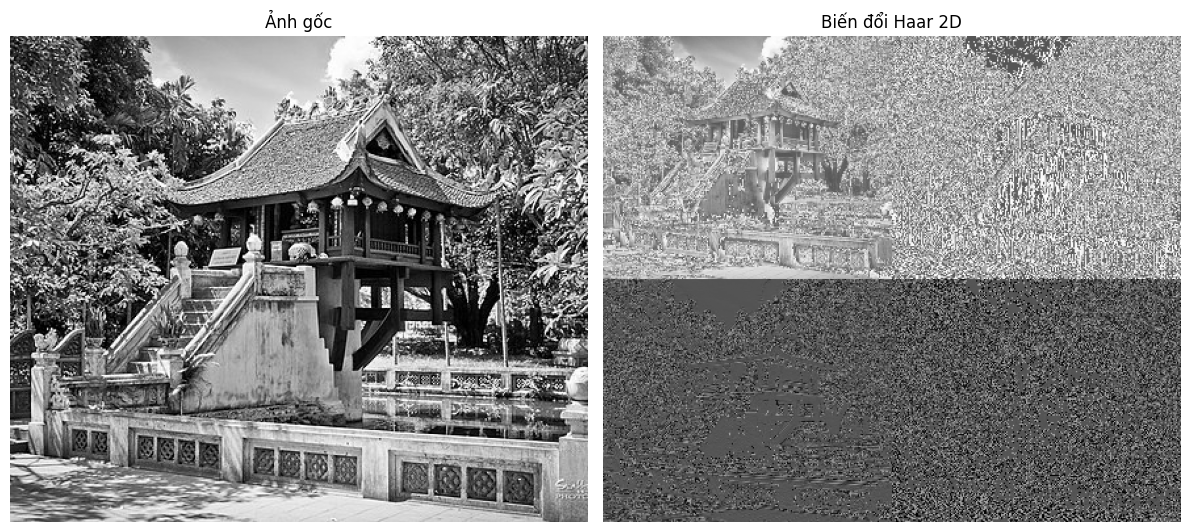

In [7]:
# Vẽ ảnh gốc và ảnh khôi phục
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(transformed_2d, cmap='gray')
plt.title('Biến đổi Haar 2D')
plt.axis('off')
plt.tight_layout()
plt.show()